## Введение

### 1. Введение в анализ данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_json('../data/train.json')
df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


Цена - target

In [3]:
df.describe().loc['count']

bathrooms     49352.0
bedrooms      49352.0
latitude      49352.0
listing_id    49352.0
longitude     49352.0
price         49352.0
Name: count, dtype: float64

Нет пустых строк

In [4]:
df_cut = df[['bathrooms', 'bedrooms', 'interest_level', 'price']]
df_cut

,bathrooms,bedrooms,interest_level,price
4,1.0,1,medium,2400
6,1.0,2,low,3800
9,1.0,2,medium,3495
10,1.5,3,medium,3000
15,1.0,0,low,2795
...,...,...,...,...
124000,1.0,3,low,2800
124002,1.0,2,medium,2395
124004,1.0,1,medium,1850
124008,1.0,2,medium,4195


#### 2. Статистический анализ данных

(array([4.9344e+04, 4.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([4.30000000e+01, 8.98421400e+04, 1.79641280e+05, 2.69440420e+05,
        3.59239560e+05, 4.49038700e+05, 5.38837840e+05, 6.28636980e+05,
        7.18436120e+05, 8.08235260e+05, 8.98034400e+05, 9.87833540e+05,
        1.07763268e+06, 1.16743182e+06, 1.25723096e+06, 1.34703010e+06,
        1.43682924e+06, 1.5266

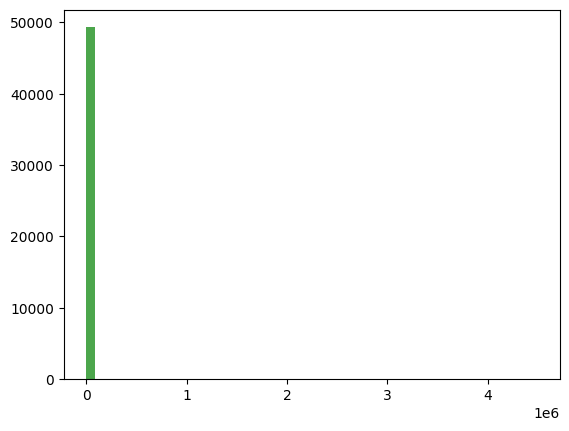

In [5]:
plt.hist(df_cut['price'], bins=50, alpha=0.7, color='green')

<Axes: xlabel='price'>

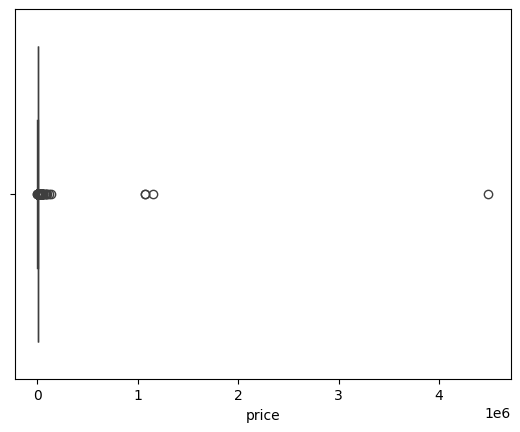

In [6]:
sns.boxplot(data=df_cut, x='price', orient='h')

Обнаружили выбросы, убираем

In [7]:
low_percentile = df_cut['price'].quantile(0.01)
high_percentile = df_cut['price'].quantile(0.99)
df_per = df_cut[(df_cut['price'] > low_percentile) & (df_cut['price'] < high_percentile)]

(array([1236., 2316., 2902., 4252., 4199., 4442., 3904., 4091., 3520.,
        2559., 2689., 1239., 1222., 1621.,  887., 1153.,  726.,  898.,
         521.,  744.,  491.,  461.,  193.,  364.,  131.,  149.,  173.,
         109.,  210.,   61.,   95.,   48.,  112.,   35.,   62.,   21.,
         131.,   10.,   11.,   30.,   25.,   72.,   19.,   39.,   17.,
          72.,    7.,   48.,   13.,   13.]),
 array([ 1485. ,  1715.2,  1945.4,  2175.6,  2405.8,  2636. ,  2866.2,
         3096.4,  3326.6,  3556.8,  3787. ,  4017.2,  4247.4,  4477.6,
         4707.8,  4938. ,  5168.2,  5398.4,  5628.6,  5858.8,  6089. ,
         6319.2,  6549.4,  6779.6,  7009.8,  7240. ,  7470.2,  7700.4,
         7930.6,  8160.8,  8391. ,  8621.2,  8851.4,  9081.6,  9311.8,
         9542. ,  9772.2, 10002.4, 10232.6, 10462.8, 10693. , 10923.2,
        11153.4, 11383.6, 11613.8, 11844. , 12074.2, 12304.4, 12534.6,
        12764.8, 12995. ]),
 <BarContainer object of 50 artists>)

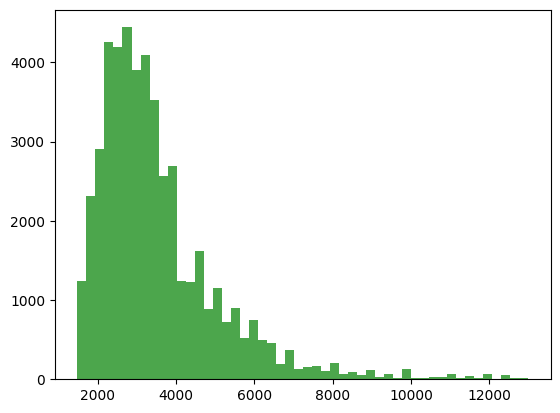

In [8]:
plt.hist(df_per['price'], bins=50, alpha=0.7, color='green')

#### 3. Анализ характеристик

Тип данных: object

In [9]:
df_per['interest_level'].value_counts()

interest_level
low       33672
medium    11114
high       3557
Name: count, dtype: int64

In [10]:
mapping = {'low': 0, 'medium': 1, 'high': 2}
df_per.loc[:, 'interest_level'] = df_per['interest_level'].map(mapping)

(array([3.0200e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        3.8913e+04, 0.0000e+00, 6.4500e+02, 0.0000e+00, 0.0000e+00,
        7.5710e+03, 0.0000e+00, 2.3000e+02, 0.0000e+00, 0.0000e+00,
        5.6400e+02, 0.0000e+00, 3.2000e+01, 0.0000e+00, 0.0000e+00,
        8.3000e+01, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
         2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
         4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
         6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
         8.8,  9. ,  9

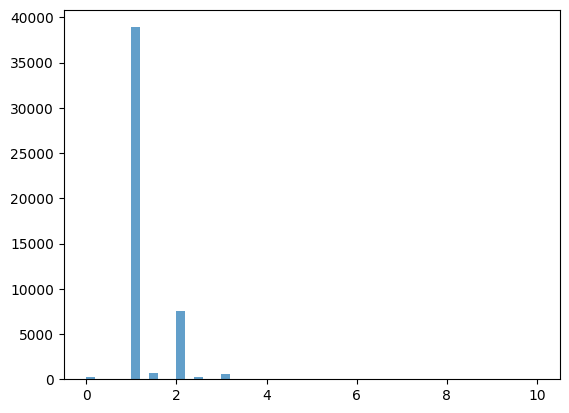

In [11]:
plt.hist(df_per['bathrooms'], bins=50, alpha=0.7)

(array([9.2000e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.5528e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.4534e+04, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 7.0550e+03, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.7750e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0400e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 4.4000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([0.  , 0.16, 0.32, 0.48, 0.64, 0.8 , 0.96, 1.12, 1.28, 1.44, 1.6 ,
        1.76, 1.92, 2.08, 2.24, 2.4 , 2.56, 2.72, 2.88, 3.04, 3.2 , 3.36,
        3.52, 3.68, 3.84, 4.  , 4.16, 4.32, 4.48, 4.64, 4.8 , 4.96, 5.12,
        5.28, 5.44, 5.6 , 5.76, 5.92, 6.08, 6.24, 6.4 , 6.56, 6.72, 6.88,
        7.04, 7.2 , 7.

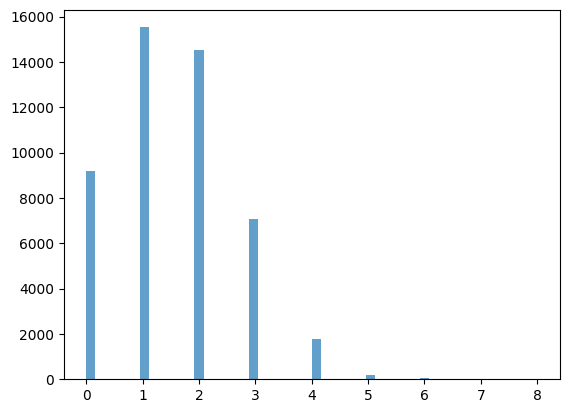

In [12]:
plt.hist(df_per['bedrooms'], bins=50, alpha=0.7)

Выбросов нет

In [13]:
df_per

,bathrooms,bedrooms,interest_level,price
4,1.0,1,1,2400
6,1.0,2,0,3800
9,1.0,2,1,3495
10,1.5,3,1,3000
15,1.0,0,0,2795
...,...,...,...,...
124000,1.0,3,0,2800
124002,1.0,2,1,2395
124004,1.0,1,1,1850
124008,1.0,2,1,4195


In [14]:
df_per.corr()

,bathrooms,bedrooms,interest_level,price
bathrooms,1.000000,0.517200,-0.062819,0.670808
bedrooms,0.517200,1.000000,0.051282,0.547310
interest_level,-0.062819,0.051282,1.000000,-0.199652
price,0.670808,0.547310,-0.199652,1.000000


<Axes: xlabel='price', ylabel='bathrooms'>

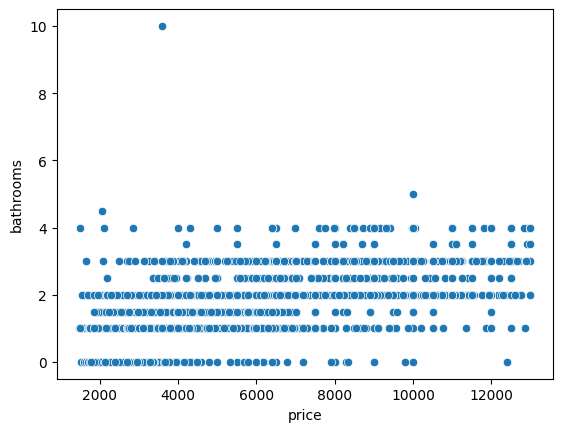

In [41]:
sns.scatterplot(data=df_per, x = 'price', y = 'bathrooms')

<Axes: xlabel='price', ylabel='bedrooms'>

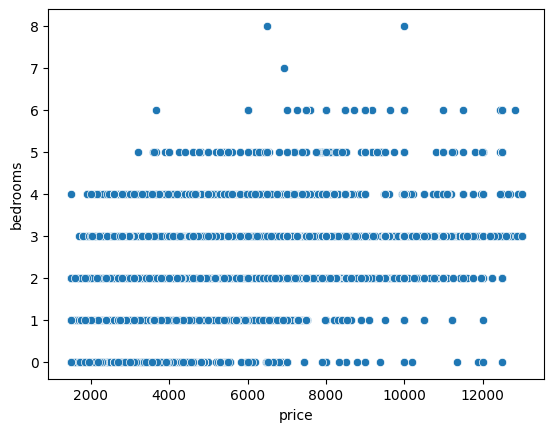

In [42]:
sns.scatterplot(data=df_per, x = 'price', y = 'bedrooms')

<Axes: >

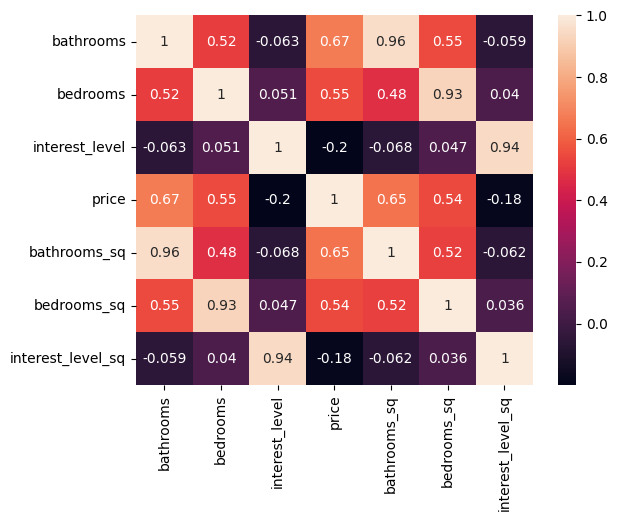

In [45]:
sns.heatmap(df_per.corr(), annot = True)

#### 4. Creating Features

In [16]:
df_sq = df_per
columns_to_square = ['bathrooms', 'bedrooms', 'interest_level']
for col in columns_to_square:
    df_sq[f'{col}_sq'] = df_per[col] ** 2
df_sq

C:\Users\natur\AppData\Local\Temp\ipykernel_14172\4195179338.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sq[f'{col}_sq'] = df_per[col] ** 2
C:\Users\natur\AppData\Local\Temp\ipykernel_14172\4195179338.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sq[f'{col}_sq'] = df_per[col] ** 2
C:\Users\natur\AppData\Local\Temp\ipykernel_14172\4195179338.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,bathrooms,bedrooms,interest_level,price,bathrooms_sq,bedrooms_sq,interest_level_sq
4,1.0,1,1,2400,1.00,1,1
6,1.0,2,0,3800,1.00,4,0
9,1.0,2,1,3495,1.00,4,1
10,1.5,3,1,3000,2.25,9,1
15,1.0,0,0,2795,1.00,0,0
...,...,...,...,...,...,...,...
124000,1.0,3,0,2800,1.00,9,0
124002,1.0,2,1,2395,1.00,4,1
124004,1.0,1,1,1850,1.00,1,1
124008,1.0,2,1,4195,1.00,4,1


In [17]:
df_sq.corr()

,bathrooms,bedrooms,interest_level,price,bathrooms_sq,bedrooms_sq,interest_level_sq
bathrooms,1.000000,0.517200,-0.062819,0.670808,0.955906,0.548426,-0.058710
bedrooms,0.517200,1.000000,0.051282,0.547310,0.478497,0.928282,0.040125
interest_level,-0.062819,0.051282,1.000000,-0.199652,-0.067757,0.047048,0.943959
price,0.670808,0.547310,-0.199652,1.000000,0.646949,0.544612,-0.182283
bathrooms_sq,0.955906,0.478497,-0.067757,0.646949,1.000000,0.521951,-0.061563
bedrooms_sq,0.548426,0.928282,0.047048,0.544612,0.521951,1.000000,0.036408
interest_level_sq,-0.058710,0.040125,0.943959,-0.182283,-0.061563,0.036408,1.000000


Возвели в квадрат значения параметров. Лучших корреляций не появилось 

In [18]:
df_model = df_per[['bathrooms', 'bedrooms', 'price']]

In [19]:
X = df_model.drop('price', axis=1)
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

In [20]:
poly = PolynomialFeatures(degree=10, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#### 5. Обучение моделей

In [21]:
result_MAE = pd.DataFrame(columns=['model', 'train', 'test'])
result_RMSE = pd.DataFrame(columns=['model', 'train', 'test'])

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

In [23]:
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

df_model['train_pred'] = np.nan
df_model['test_pred'] = np.nan

df_model.loc[X_train.index, 'train_pred'] = y_train_pred
df_model.loc[X_test.index, 'test_pred'] = y_test_pred

C:\Users\natur\AppData\Local\Temp\ipykernel_14172\2622624042.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['train_pred'] = np.nan
C:\Users\natur\AppData\Local\Temp\ipykernel_14172\2622624042.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['test_pred'] = np.nan


In [24]:
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

In [25]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

In [26]:
result_MAE = pd.DataFrame({
        'model': ['linreg'],
        'train': [mae_train],
        'test': [mae_test]
    })
result_MAE

,model,train,test
0,linreg,1191.152612,1208.667742


In [27]:
result_RMSE = pd.DataFrame({
        'model': ['linreg'],
        'train': [mae_train],
        'test': [mae_test]
    })
result_RMSE

,model,train,test
0,linreg,1191.152612,1208.667742


In [28]:
dt_model = DecisionTreeRegressor(random_state=21)
dt_model.fit(X_train_poly, y_train)

y_train_pred_dt = dt_model.predict(X_train_poly)
y_test_pred_dt = dt_model.predict(X_test_poly)


In [29]:
mae_train = mean_absolute_error(y_train, y_train_pred_dt)
mae_test = mean_absolute_error(y_test, y_test_pred_dt)

In [30]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_dt))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_dt))

In [31]:
result_MAE = pd.concat([
    result_MAE,
    pd.DataFrame({
        'model': ['decision_tree'],
        'train': [mae_train],
        'test': [mae_test]
    })
], ignore_index=True)
result_MAE

,model,train,test
0,linreg,1191.152612,1208.667742
1,decision_tree,752.631597,757.867468


In [32]:
result_RMSE = pd.concat([
    result_RMSE,
    pd.DataFrame({
        'model': ['decision_tree'],
        'train': [mae_train],
        'test': [mae_test]
    })
], ignore_index=True)
result_RMSE

,model,train,test
0,linreg,1191.152612,1208.667742
1,decision_tree,752.631597,757.867468


In [33]:
train_mean_price = y_train.mean()
train_median_price = y_train.median()

test_mean_price = y_test.mean()
test_median_price = y_test.median()

In [34]:
df_model['train_mean_price'] = train_mean_price 
df_model['train_median_price'] = train_median_price  

df_model['test_mean_price'] = test_mean_price 
df_model['test_median_price'] = test_median_price  


C:\Users\natur\AppData\Local\Temp\ipykernel_14172\2520702780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['train_mean_price'] = train_mean_price


In [35]:
mae_train_mean = mean_absolute_error(y_train, [train_mean_price] * len(y_train))
mae_train_median = mean_absolute_error(y_train, [train_median_price] * len(y_train))

mae_test_mean = mean_absolute_error(y_test, [train_mean_price] * len(y_test))
mae_test_median = mean_absolute_error(y_test, [train_median_price] * len(y_test))

In [36]:
rmse_train_mean = np.sqrt(mean_squared_error(y_train, [train_mean_price] * len(y_train)))
rmse_train_median = np.sqrt(mean_squared_error(y_train, [train_median_price] * len(y_train)))

rmse_test_mean = np.sqrt(mean_squared_error(y_test, [train_mean_price] * len(y_test)))
rmse_test_median = np.sqrt(mean_squared_error(y_test, [train_median_price] * len(y_test)))

In [37]:
result_MAE = pd.concat([
    result_MAE,
    pd.DataFrame({
        'model': ['naive_mean'],
        'train': [mae_train_mean],
        'test': [mae_test_mean]
    })
], ignore_index=True)

result_MAE = pd.concat([
    result_MAE,
    pd.DataFrame({
        'model': ['naive_median'],
        'train': [mae_train_median],
        'test': [mae_test_median]
    })
], ignore_index=True)

In [38]:
result_RMSE = pd.concat([
    result_RMSE,
    pd.DataFrame({
        'model': ['naive_mean'],
        'train': [rmse_train_mean],
        'test': [rmse_test_mean]
    })
], ignore_index=True)

result_RMSE = pd.concat([
    result_RMSE,
    pd.DataFrame({
        'model': ['naive_median'],
        'train': [rmse_train_median],
        'test': [rmse_test_median]
    })
], ignore_index=True)

In [39]:
result_MAE

,model,train,test
0,linreg,1191.152612,1208.667742
1,decision_tree,752.631597,757.867468
2,naive_mean,1138.382674,1123.616792
3,naive_median,1085.933470,1067.371186


In [40]:
result_RMSE

,model,train,test
0,linreg,1191.152612,1208.667742
1,decision_tree,752.631597,757.867468
2,naive_mean,1588.709721,1573.171419
3,naive_median,1635.677354,1615.794254


Разлчия в метриках небольшие. Модель обучена хорошо